In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
insurance_data=pd.read_csv('/content/insurance.csv')

In [36]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
X=insurance_data.drop(columns=['charges'])
y=insurance_data['charges']

# Map 'sex' to numerical
X['sex']=X['sex'].map({'male':0,'female':1})

# Map 'smoker' to numerical, cleaning potential whitespace
X['smoker']=X['smoker'].str.strip().map({'yes':1,'no':0})

# One-hot encode 'region' and concatenate with X, dropping the original 'region' column
X = pd.get_dummies(X,columns=["region"],drop_first=True,dtype=int)

# Create interaction terms
X['age-smoker']=X['age']*X['smoker']
X['BMI-smoker']=X['bmi']*X['smoker']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

mse for 0.001 : 20922599.87103596
mse for 0.1 : 20921803.698431376
mse for 1 : 20914832.63508914
mse for 2 : 20908106.779954515
mse for 5 : 20890881.000633497
mse for 10 : 20872844.794796683
mse for 20 : 20877828.53237883
mse for 30 : 20937537.133939773
mse for 40 : 21046489.29389078
mse for 50 : 21196929.8696089
mse for 100 : 22423172.686023254


<Axes: >

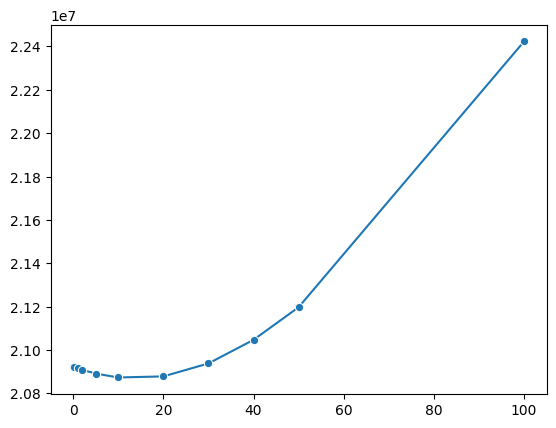

In [39]:
alphas=[0.001, 0.1, 1, 2, 5, 10, 20, 30, 40, 50, 100]
mses=[]

for a in alphas:
  lasso_model=Lasso(alpha=a)
  lasso_model.fit(X_train,y_train)
  y_pred=lasso_model.predict(X_test)
  mse=mean_squared_error(y_test,y_pred)
  print(f"mse for {a} :",mse)
  mses.append(mse)
sns.lineplot(x=alphas,y=mses,marker="o")

In [45]:
#using lasssoCV
from sklearn.linear_model import LassoCV
lasso_model_cv=LassoCV(alphas=alphas,cv=5,max_iter=1000,random_state=42)
lasso_model_cv.fit(X_train,y_train)
y_pred=lasso_model_cv.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mse:",mse)
print("r2 score:",r2)
print("best alpha :",lasso_model_cv.alpha_)

mse: 20922599.87103596
r2 score: 0.8652317499151699
best alpha : 0.001
